In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("D:/Business Analytics/Assigments/Semester 3/anemia.csv")

In [3]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [4]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Gender,1421.0,0.520760,0.499745,0.0,0.0,1.0,1.0,1.0
Hemoglobin,1421.0,13.412738,1.974546,6.6,11.7,13.2,15.0,16.9
MCH,1421.0,22.905630,3.969375,16.0,19.4,22.7,26.2,30.0
MCHC,1421.0,30.251232,1.400898,27.8,29.0,30.4,31.4,32.5
MCV,1421.0,85.523786,9.636701,69.4,77.3,85.3,94.2,101.6
Result,1421.0,0.436312,0.496102,0.0,0.0,0.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [6]:
# Checking the data types in each column
print(df.dtypes)

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object


In [7]:
# Checking for missing values in each column
print(df.isnull().sum())

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


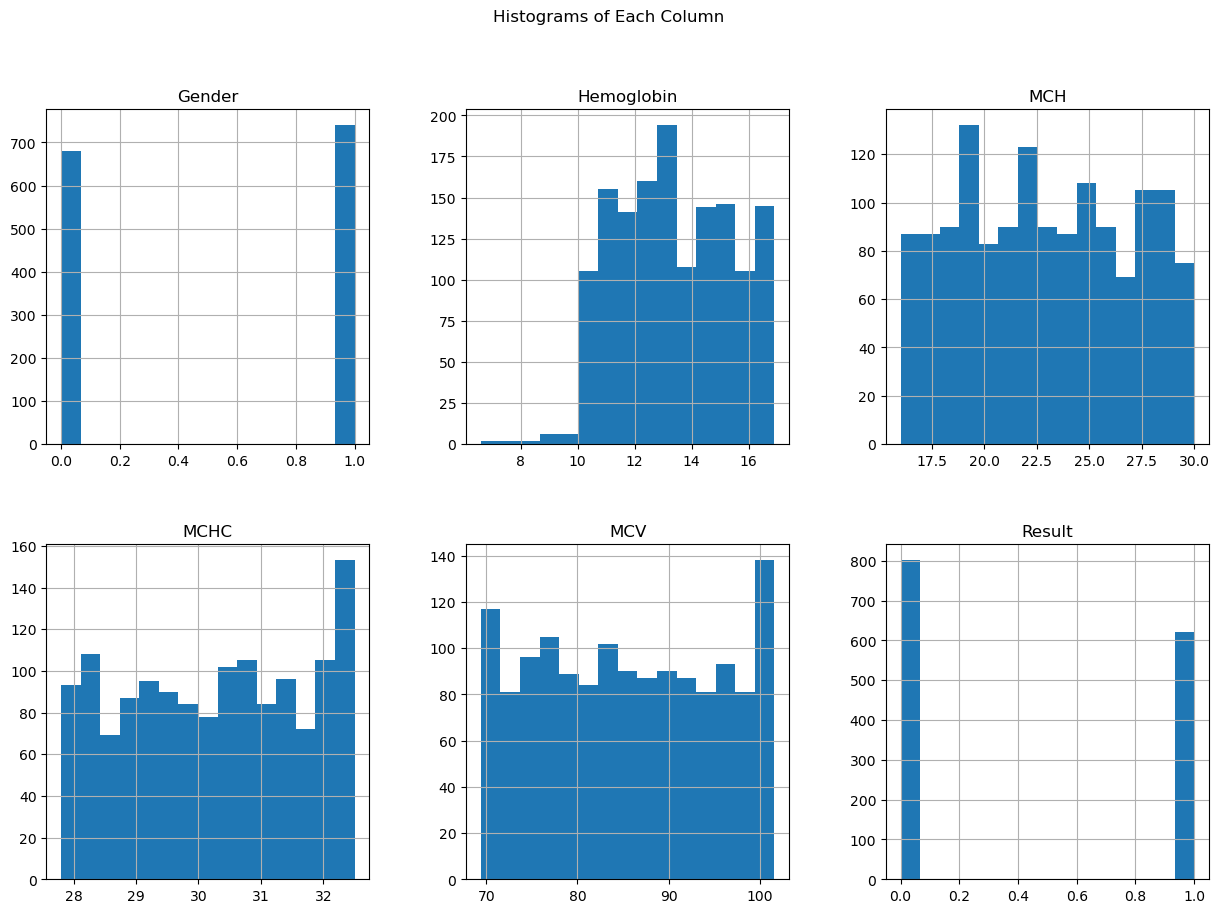

In [8]:
# Creating histograms for each column to visualize distributions
df.hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Histograms of Each Column')
plt.show()

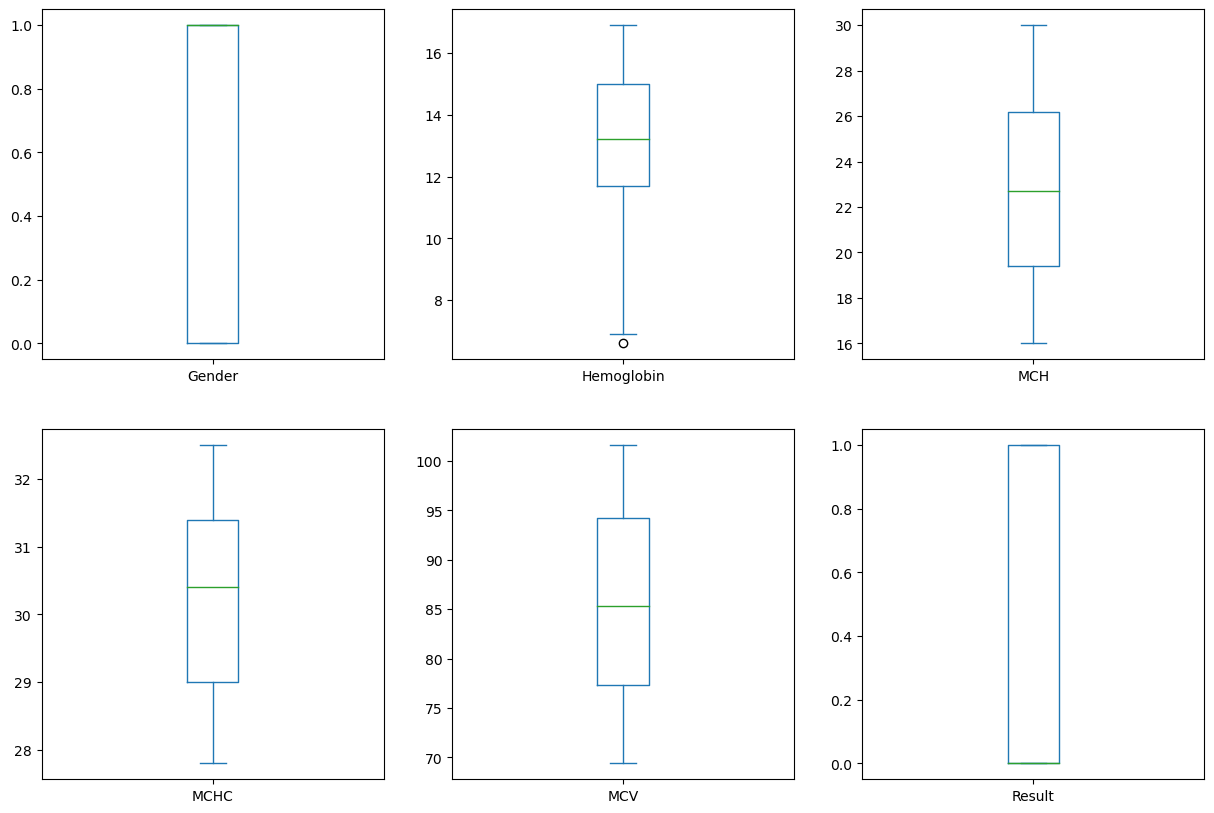

In [9]:
# Creating boxplots for each column to detect outliers
df.plot(kind='box', subplots=True, layout=(2,3), sharex=False, sharey=False, figsize=(15,10))
plt.show()

In [27]:
# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from the 'Hemoglobin' column
data_cleaned = remove_outliers(df, 'Hemoglobin')

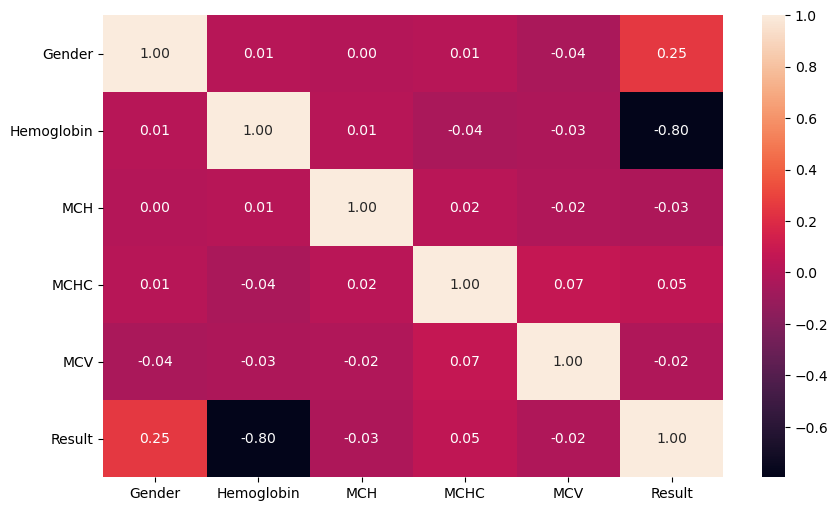

In [10]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [11]:
# Calculate and print the skewness of each numerical column
skewness = df.skew()
print(skewness)

Gender       -0.083200
Hemoglobin    0.022746
MCH           0.046294
MCHC         -0.077379
MCV           0.032054
Result        0.257114
dtype: float64


In [12]:
# Calculating and printing the counts for each class in the 'Result' column
class_counts = df['Result'].value_counts()
print("Class Counts in 'Result':")
print(class_counts)

Class Counts in 'Result':
0    801
1    620
Name: Result, dtype: int64


In [13]:
# Calculating and printing the percentage of each class in the 'Result' column
class_percentages = (class_counts / len(df)) * 100
print("\nClass Percentages in 'Result':")
print(class_percentages)


Class Percentages in 'Result':
0    56.368754
1    43.631246
Name: Result, dtype: float64


In [14]:
# if data was imbalanced smote would have been applied here 

In [15]:
# Feature scaling for continuous variables
scaler = StandardScaler()
features_to_scale = ['Hemoglobin', 'MCH', 'MCHC', 'MCV']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [16]:
# Features (all columns except 'Result')
X = df.drop('Result', axis=1)  
# Target variable
y = df['Result']               

In [17]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
# Model Training
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Model Evaluation
# Predicting on the Test Set
y_pred = log_reg.predict(X_test)

# Generating the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing the evaluation results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))

Confusion Matrix:
[[241   4]
 [  0 182]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       245
           1       0.98      1.00      0.99       182

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427


Accuracy: 99.06%


In [26]:
# Perform cross-validation
scores = cross_val_score(log_reg, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.98947368 0.98591549 0.99295775 0.98943662 0.98943662]
Average Cross-Validation Score: 0.9894440326167532


In [19]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[241   4]
 [  0 182]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       245
           1       0.98      1.00      0.99       182

    accuracy                           0.99       427
   macro avg       0.99      0.99      0.99       427
weighted avg       0.99      0.99      0.99       427

Accuracy Score: 0.990632318501171


In [25]:
# Perform cross-validation
scores = cross_val_score(svm_model, X, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.98596491 0.97887324 0.99295775 0.99295775 0.99295775]
Average Cross-Validation Score: 0.9887422782307882


In [20]:
# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[236   9]
 [  6 176]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       245
           1       0.95      0.97      0.96       182

    accuracy                           0.96       427
   macro avg       0.96      0.97      0.96       427
weighted avg       0.97      0.96      0.96       427

Accuracy Score: 0.9648711943793911


D:\Business Analytics\Python\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
# Perform cross-validation
# cv specifies the number of folds; 5 or 10 is a common choice
scores = cross_val_score(knn_model, X, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())


Cross-Validation Scores: [0.95789474 0.96478873 0.96830986 0.95422535 0.95070423]
Average Cross-Validation Score: 0.9591845811712381


D:\Business Analytics\Python\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Business Analytics\Python\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

In [22]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


D:\Business Analytics\Python\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Business Analytics\Python\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.9939647733617584
Confusion Matrix:
[[245   0]
 [  0 182]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       245
           1       1.00      1.00      1.00       182

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427

Accuracy Score: 1.0


D:\Business Analytics\Python\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
